In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [31]:
def draw(Ox, Oy: list[list], name: str, scatter: bool = False):
    f = plt.figure(figsize=(7, 7))
    px1 = f.add_subplot(111)
    if not scatter:
        for y in Oy:
            px1.plot(Ox, y, label=name)
    else:
        for y in Oy:
            px1.scatter(Ox, y, label=name)
    px1.legend()
    f.show()

In [32]:
def fx(xvn, yvn, a):
    print(xvn, yvn)
    return -a*((xvn**3)/3-xvn)+a*yvn

def fy(xvn, yvn, c, b):
    return -xvn + c - b*yvn

In [33]:
def newtonsMethod(a, c, T, y, b, x):
    l = [x]
    for i in range(100):
        xn = l[-1]
        f = -xn+(-a*(xn**3/3-xn)+a*((-xn+c)*T+y)/(1+b*T))*T+x
        g = -1+a*T*(-T/(b*T+1)-xn**2+1)
        l.append(l[-1] - f/g)
    return l[-1]

In [34]:
def explicit_method(T, a, xvn, yvn, c, b):
    xn1 = T*fx(xvn, yvn, a) + xvn
    yn1 = T*fy(xvn, yvn, c, b) + yvn
    return (xn1, yn1)

In [35]:
def implicit_method(T, a, xvn, yvn, c, b):
    xn2 = newtonsMethod(a, c, T, yvn, b, xvn)
    yn2 = (T*(-xn2+c) + yvn)/(1+b*T)
    return (xn2, yn2)

In [36]:
def explicit4_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + T/2*kx1, yvn + T/2, a)
    kx3 = fx(xvn + T/2*kx2, yvn + T/2, a)
    kx4 = fx(xvn + T*kx3, yvn + T, a)
    xn = xvn + T/6*(kx1 + 2 * kx2 + 2 * kx3 + kx4)

    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + T/2, yvn + T/2 * ky1, c, b)
    ky3 = fy(xvn + T/2, yvn + T/2 * ky2, c, b)
    ky4 = fy(xvn + T/2, yvn + T * ky3, c, b)
    yn = yvn + T/6*(ky1 + 2 * ky2 + 2 * ky3 + ky4)
    
    return (xn, yn)

In [37]:
def explicit5_method(T, a, xvn, yvn, c, b):
    kx1 = fx(xvn, yvn, a)
    kx2 = fx(xvn + 1/4 * T * kx1,
             yvn + 3/2 * T, a)
    if xvn + (3/32 * kx1 + 9/32 * kx2) * T > 10:
        print(xvn + (3/32 * kx1 + 9/32 * kx2) * T)
    kx3 = fx(xvn + (3/32 * kx1 + 9/32 * kx2) * T,
             yvn + 3/8 * T, a)
    kx4 = fx(xvn + (1932/2197 * kx1 - 
             7200/2197 * kx2 + 7296/2197 * kx3) * T,
             yvn + 12/13 * T, a)
    kx5 = fx(xvn + (439/216 * kx1 - 8 * kx2
                    + 3680/513 * kx3 - 845/4104 * kx4) * T,
                    yvn + T, a)
    kx6 = fx(xvn + (-8/27 * kx1 + 2 * kx2 - 3544/2565 * kx3
                    + 1859/4104 * kx4 + 11/40 * kx5) * T,
                    yvn + 1/2 * T, a)
    xn = xvn + (16/135 * kx1 + 6656/12825 * kx3
                + 28561/56430 * kx4 + 2/55 * kx5
                - 9/50 * kx6) * T
    
    ky1 = fy(xvn, yvn, c, b)
    ky2 = fy(xvn + 3/2 * T,
             yvn + 1/4 * T * ky1, c, b)
    ky3 = fy(xvn + 3/8 * T,
             yvn + (3/32 * ky1 + 9/32 * ky2) * T, c, b)
    ky4 = fy(xvn + 12/13 * T, yvn + (1932/2197 * ky1 - 
            7200/2197 * ky2 + 7296/2197 * ky3) * T, c, b)
    ky5 = fy(xvn + T, yvn + (439/216 * ky1 - 8 * ky2
             + 3680/513 * ky3 - 845/4104 * ky4) * T, c, b)
    ky6 = fy(xvn + 1/2 * T,
             yvn + (-8/27 * ky1 + 2 * ky2 - 3544/2565 * ky3
             + 1859/4104 * ky4 + 11/40 * ky5) * T, c, b)
    yn = yvn + (16/135 * ky1 + 6656/12825 * ky3
                + 28561/56430 * ky4 + 2/55 * ky5
                - 9/50 * ky6) * T

    return (xn, yn)

In [38]:
# новый шаг
def get_p(array):
    s = sum([i ** 2 for i in array])
    return math.sqrt(s)

def new_T(last_T, T0, array, array_prev, L):
    p = get_p(array)
    F = [i / p for i in array]
    # print(sum([i ** 2 for i in F]))
    p_prev = get_p(array_prev)
    F_prev = [i / p_prev for i in array_prev]
    X = [(F[i] - F_prev[i]) / last_T for i in range(len(F))]
    XX = sum([i ** 2 for i in X])
    new_T = T0/(1 + math.sqrt(L) * XX ** (1/4))
    # print(new_T)
    return new_T

In [39]:
def do_method(method_num, t_start, t_finish, tl, array, veriables):
    T0, T, a, b, c = [i for i in veriables]
    array_T = [T]
    array_dif = [(fx(array[-1][0], array[-1][1], a),
                    fy(array[-1][0], array[-1][1], c, b))]
    while tl[-1] <= t_finish:
        if method_num == 1:
            array.append(explicit_method(T, a, array[-1][0], array[-1][1], c, b))
        elif method_num == 2:
            array.append(implicit_method(T, a, array[-1][0], array[-1][1], c, b))
        elif method_num == 3:
            array.append(explicit4_method(T, a, array[-1][0], array[-1][1], c, b))
        elif method_num == 4:
            array.append(explicit5_method(T, a, array[-1][0], array[-1][1], c, b))
        array_dif.append((fx(array[-1][0], array[-1][1], a),
                fy(array[-1][0], array[-1][1], c, b)))
        T = new_T(array_T[-1], T0, array[-1], array[-2], t_finish - t_start)
        array_T.append(T)
        tl.append(tl[-1] + T)
    return (tl, array, array_dif)

$x' = -a(\frac{x^3}{3} - x) - ay$\
$y' = -x - by + c$\
$x(0) = 2,\quad y(0) = 0$\
Здесь 1 $\leq$ _a_ $\leq$ 10^3, 0 < _c_ < 1.
Провести исследование поведения решений в зависимости от значений «большого» параметра _a_.


2 0
2 0
1.9666666666666668 -0.0014
1.9666666666666668 -0.0014
1.9216648975463755 -0.0035556073818400038
1.9216648975463755 -0.0035556073818400038
1.8865607076797555 -0.005626612502736933
1.8865607076797555 -0.005626612502736933
1.8585283360546325 -0.007640504914051299
1.8585283360546325 -0.007640504914051299
1.8358212760145245 -0.009611139216057706
1.8358212760145245 -0.009611139216057706
1.8172227881763217 -0.011548437959991305
1.8172227881763217 -0.011548437959991305
1.8018525777000085 -0.013459685475124836
1.8018525777000085 -0.013459685475124836
1.7890545587804099 -0.01535034131839004
1.7890545587804099 -0.01535034131839004
1.778328200967294 -0.017224557171698796
1.778328200967294 -0.017224557171698796
1.7692844879364173 -0.019085521989880658
1.7692844879364173 -0.019085521989880658
1.7616165365959096 -0.020935701637684795
1.7616165365959096 -0.020935701637684795
1.7550793366970283 -0.022777010601337414
1.7550793366970283 -0.022777010601337414
1.7494753762522808 -0.0246109382038931

/tmp/ipykernel_3214/182673695.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


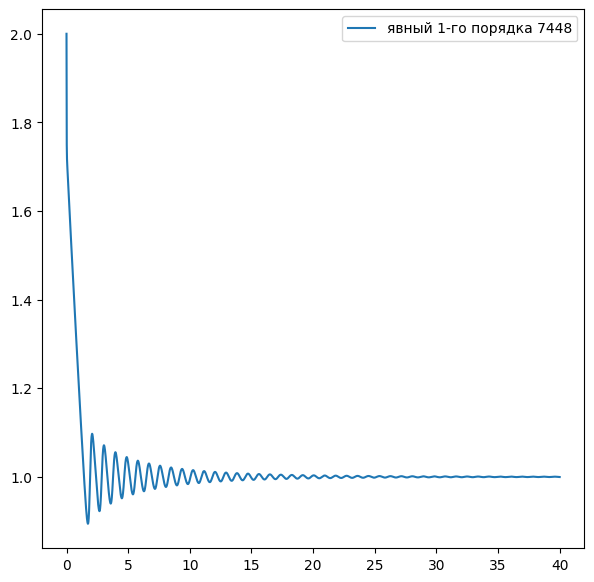

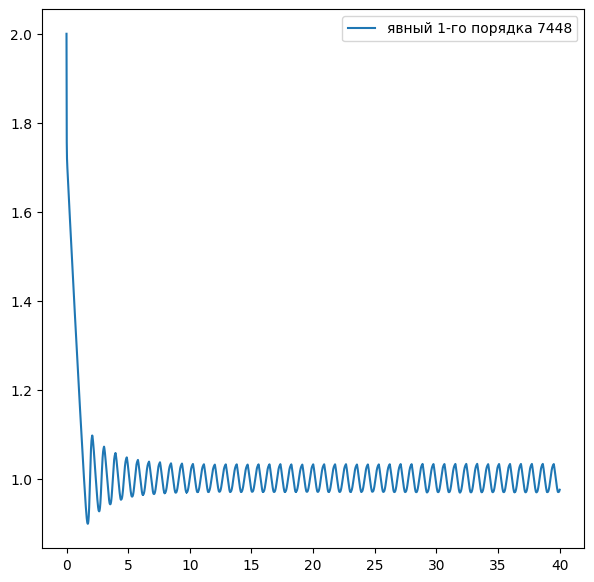

In [49]:
T0 = 0.01
T = 0.001
t_start = 0
t_finish = 40
a = 50
c = 0.5
b = 0.60
# Первый элемент это x, второй y
# 1 - явный первого; 2 - неявный первого; 3 - рунге-кутты четвертого
# 4 - рунге-кутты пятого; 5 - 
veriables = (T0, T, a, b, c)
array0 = [(2, 0)]
array1 = do_method(1, t_start, t_finish, [t_start], [(2, 0)], veriables)
array2 = do_method(3, t_start, t_finish, [t_start], [(2, 0)], veriables)
arrayx1 = [i[0] for i in array1[1]]
arrayx2 = [i[0] for i in array2[1]]
# arrayx2 = [i[0] for i in array2]
# arrayx3 = [i[0] for i in array3]
# arrayx4 = [i[0] for i in array4]

# main_array.append(arrayx3)
print(len(array1[0]), len(array2[0]), len(arrayx1), len(arrayx2))
# array_dif_x3 = [[i[0] for i in array3_dif]]
draw(array1[0], [arrayx1], f"явный 1-го порядка {len(array1[0])}")
draw(array2[0], [arrayx2], f"явный 1-го порядка {len(array1[0])}")
# draw(px1, tl, arrayx2, "неявный 1-го порядка")
# draw(tl, [arrayx3], f"{a}, {c} рунге-кутты")
# draw(tl, array_dif_x3, f"{a} x' from t")
# draw(arrayx3, array_dif_x3, "x' from x")